<a href="https://colab.research.google.com/github/JangAyeon/ToBigs/blob/master/%5B2%5DOptimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tobig's 15기 2주차 Optimization 과제

# Gradient Descent 구현하기

### 1)"..."표시되어 있는 빈 칸을 채워주세요
### 2)강의내용과 코드에 대해 공부한 내용을 마크마운 또는 주석으로 설명해주세요

## 데이터

In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
data = pd.read_csv('assignment_2.csv')
data.head()

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000


## Train Test 데이터 나누기

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], test_size = 0.25, random_state = 0)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 3), (50, 3), (150,), (50,))

In [6]:
X_train

,bias,experience,salary
71,1,5.3,48000
124,1,8.1,66000
184,1,3.9,60000
97,1,0.2,45000
149,1,1.1,66000
...,...,...,...
67,1,6.7,64000
192,1,4.8,73000
117,1,7.0,86000
47,1,7.6,78000


## Scaling

experience와 salary의 단위, 평균, 분산이 크게 차이나므로 scaler를 사용해 단위를 맞춰줍니다. 

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bias_train = X_train["bias"]
bias_train = bias_train.reset_index()["bias"]
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train["bias"] = bias_train
X_train.head()

,bias,experience,salary
0,1,0.187893,-1.143335
1,1,1.185555,0.043974
2,1,-0.310938,-0.351795
3,1,-1.629277,-1.341220
4,1,-1.308600,0.043974


이때 scaler는 X_train에 fit 해주시고, fit한 scaler를 X_test에 적용시켜줍니다.  
똑같이 X_test에다 fit하면 안돼요!

In [8]:
bias_test = X_test["bias"]
bias_test = bias_test.reset_index()["bias"]
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test["bias"] = bias_test
X_test.head()

,bias,experience,salary
0,1,-1.344231,-0.615642
1,1,0.508570,0.307821
2,1,-0.310938,0.571667
3,1,1.363709,1.956862
4,1,-0.987923,-0.747565


In [9]:
# parameter 개수
N = len(X_train.loc[0])

In [10]:
# 초기 parameter들을 임의로 설정해줍니다.
parameters = np.array([random.random() for i in range(N)])
random_parameters = parameters.copy()
parameters

array([0.14301419, 0.40251885, 0.60800072])

### * LaTeX   

Jupyter Notebook은 LaTeX 문법으로 수식 입력을 지원하고 있습니다.  
LaTeX문법으로 아래의 수식을 완성해주세요  
http://triki.net/apps/3466  
https://jjycjnmath.tistory.com/117

## Dot product
## $z = X_i \theta$

In [11]:
def dot_product(X, parameters):
    z = 0
    for i in range(len(parameters)):
        z +=X[i]*parameters.T[i]
    return z

## Logistic Function

## $p =\frac{1}{1+e^{-Z}}$

In [12]:
def logistic(X, parameters):
    z = dot_product(X,parameters)
    p =np.exp(z)/(1 + np.exp(z))   
    return p

In [13]:
logistic(X_train.iloc[1], parameters)

0.6563248503041921

## Object function

Object Function : 목적함수는 Gradient Descent를 통해 최적화 하고자 하는 함수입니다.  
<br>
선형 회귀의 목적함수
## $l(\theta) = \frac{1}{2}\Sigma(y_i - \theta^{T}X_i)^2$  
참고) $\hat{y_i} = \theta^{T}X_i$
  
로지스틱 회귀의 목적함수를 작성해주세요  
(선형 회귀의 목적함수처럼 강의에 나온대로 작성해주세요. 평균을 고려하는 것은 뒤에 코드에서 수행합니다)
## $l(p) = -\Sigma((y_ilog p(X_i))+(i-y_i)log(1-p(X_i)))$

In [14]:
def minus_log_cross_entropy_i(X, y, parameters):
    p = logistic(X,parameters)
    loss =-np.sum((y*np.log(p)+(1-y)*np.log(1-p)))
    return loss

In [15]:
def mse_i(X, y, parameters):
    y_hat = dot_product(X,parameters)
    loss = (np.sum((y-y_hat)**2))/2
    return loss

In [16]:
def batch_loss(X_set, y_set, parameters, loss_function, n): #n:현재 배치의 데이터 수
    loss = 0

    for i in range(X_set.shape[0]):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        loss +=loss_function(X,y,parameters)
    loss = loss/n #loss 평균값으로 계산
    return loss

In [17]:
batch_loss(X_test, y_test, parameters, minus_log_cross_entropy_i, len(X_test))

0.9780374264298508

## Gradient
위의 선형회귀의 목적함수 $l(\theta)$와 로지스틱회귀의 목적함수 $l(p)$의 gradient를 작성해주세요  
(위의 목적함수를 참고해서 작성해주세요 = 평균을 고려하는 것은 뒤에 코드에서 수행합니다)

## ${\partial\over{\partial \theta_j}}l(\theta)=\Sigma(y_i-\theta^{T}X_i)X_{ik}$
## ${\partial\over{\partial \theta_j}}l(p)=\Sigma((y_i-p_i)X_{ij})$ 

In [18]:
def get_gradient_ij(X, y, parameters, j, model):
    if model == 'linear':
        y_hat = dot_product(parameters.T,X)
        gradient =X[j]*(y-y_hat)
    else:
        p =logistic(X,parameters)
        gradient =(y-p) *X[j]
    return -gradient

In [19]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'logistic')

-0.11591534229568734

## Batch Gradient
하나의 배치 (X_set, y_set)에 대해 기울기를 구하는 코드를 작성해주세요

In [20]:
def batch_gradient(X_set, y_set, parameters, model):
    gradients = [0 for _ in range(len(parameters))]
    
    for i in range(X_set.shape[0]):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        for j in range(len(parameters)):
            gradients[j] += get_gradient_ij(X,y,parameters,j,model) #???
    
    return gradients

In [21]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'logistic')
gradients1

[37.04643911461055, 9.629822347366838, 42.93911094489016]

## mini-batch
인덱스로 미니 배치 나누기

In [22]:
def batch_idx(X_train, batch_size):
    N = len(X_train)
    nb = (N // batch_size)+1 #number of batch
    idx = np.array([i for i in range(N)])
    idx_list = [idx[i*batch_size:(i+1)*batch_size] for i in range(nb) if len(idx[i*batch_size:(i+1)*batch_size]) != 0]

    return idx_list

batch_idx 함수에 대한 설명을 batch_size와 함께 간략하게 작성해주세요  
### 설명: 총 데이터 갯수와 총 batch의 갯수로 나눠 크기를 정하고, for문을 이용해 idx_list에 그 갯수 단위로 나누어 배치 안에서 들어갈 원래 데이터의 인덱스를 할당

## Update Parameters
기울기를 갱신하는 코드를 작성해주세요  
(loss와 마찬가지로 기울기를 갱신할 때 배치 사이즈를 고려해 평균으로 갱신해주세요)

In [23]:
def step(parameters, gradients, learning_rate, n): #n:현재 배치의 데이터 수


    for i in range(len(parameters)):
        gradients[i] *= learning_rate/n
    
    parameters -= gradients
    return parameters

In [24]:
step(parameters, gradients1, 0.01, len(X_train))

array([0.14054443, 0.40187686, 0.60513811])

## Gradient Descent
위에서 작성한 함수들을 조합해서 경사하강법 함수를 완성해주세요

- learning_rate: 학습률  
- tolerance: Step이 너무 작아서 더 이상의 학습이 무의미할 때 학습을 멈추는 조건  
- batch: 기울기를 1번 갱신할 때 사용하는 데이터셋  
- epoch:  주어진 반복 횟수만큼 반복함
- num_epoch:반복 횟수
<br>

BGD: 학습 한 번에 모든 데이터셋에 대해 기울기를 구한다<br>
SGD: 학습 한 번에 임의의 데이터에 대해서만 기울기를 구한다<br>
MGD:학습 한 번에 데이터셋의 일부에 대해서만 기울기를 구한다<br>
<br>
batch_size에 따른 경사하강법의 종류를 적어주세요  
batch_size=1 -> SGD
batch_size=k -> MGD
batch_size=whole -> BGD

In [25]:
def gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16):
    stopper = False
    
    N = len(X_train.iloc[0])
    parameters = np.random.rand(N)

    loss_function_set = minus_log_cross_entropy_i if model == 'logistic' else mse_i  
   

    loss = 999
    batch_idx_list = batch_idx(X_train, batch_size)


    for epoch in range(num_epoch):
        if stopper:
            break
        for idx in batch_idx_list:
            X_batch = X_train.iloc[idx,:]
            y_batch = y_train.iloc[idx]

            gradients = batch_gradient(X_batch,y_batch,parameters,model)
            parameters = step(parameters,gradients,learning_rate,batch_size)
            new_loss = batch_loss(X_batch,y_batch,parameters,loss_function_set,batch_size)
            
          #중단 조건
            if (abs(new_loss - loss) < tolerance):
                stopper = True
                break
            loss = new_loss
        
        #100epoch마다 학습 상태 출력
        if epoch%10 == 0: #출력이 길게 나오면 check point를 수정해도 됩니다.
            print(f"epoch: {epoch}  loss: {new_loss}  params: {parameters}  gradients: {gradients}")
    
    return parameters

## Implement
경사하강법 함수를 이용해 최적의 모수 찾아보세요. 학습을 진행할 때, Hyper Parameter를 바꿔가면서 학습시켜보세요.

## Logistic Regression

In [26]:
new_param_bgd = gradient_descent(X_train, y_train,tolerance=0.0001,learning_rate=0.03,batch_size=X_train.shape[0])
new_param_bgd

epoch: 0  loss: 1.132858431163191  params: [0.86002647 0.91768245 0.68375025]  gradients: [0.010790433921284882, 0.0037047968242751358, 0.009599732878739296]
epoch: 10  loss: 1.0613114043248266  params: [0.75393806 0.88168227 0.58916968]  gradients: [0.010455871765653718, 0.003509825745995656, 0.009336938537963706]
epoch: 20  loss: 0.9944558187840473  params: [0.65135672 0.84779765 0.49741054]  gradients: [0.010091961944771749, 0.0032845654541531813, 0.009038786204360333]
epoch: 30  loss: 0.9325925761440709  params: [0.55257313 0.81633383 0.40883011]  gradients: [0.00969941991672509, 0.003028803007296424, 0.008704843132285171]
epoch: 40  loss: 0.8759483466920993  params: [0.45786271 0.7875895  0.32378012]  gradients: [0.0092804716214933, 0.002743967952444619, 0.00833655248822151]
epoch: 50  loss: 0.8246480127867292  params: [0.36746946 0.76183828 0.24258541]  gradients: [0.008839022107003254, 0.0024334869522464114, 0.007937670913973616]
epoch: 60  loss: 0.7786929270455819  params: [0.2

array([-1.06660795,  1.53803336, -1.45076849])

In [27]:
new_param_sgd = gradient_descent(X_train, y_train,model='logistic',batch_size=1,learning_rate=0.01,num_epoch=100)
new_param_sgd

epoch: 0  loss: 0.9686117682923773  params: [ 0.24639033  0.74900115 -0.23137331]  gradients: [0.006230148977556198, 0.0033904530325247627, 0.004383475140578348]
epoch: 10  loss: 0.27108616692243365  params: [-0.99498152  1.38337902 -1.31407359]  gradients: [0.002382226975165722, 0.0012964101984092658, 0.0016761128445679935]
epoch: 20  loss: 0.21569989077594273  params: [-1.1762817   1.92980241 -1.84481969]  gradients: [0.0019456842725942606, 0.0010588432421307125, 0.0013689654406429117]
epoch: 30  loss: 0.1868202646053056  params: [-1.28428113  2.31203229 -2.21246996]  gradients: [0.0017084020543336592, 0.0009297140320004236, 0.0012020158686834588]
epoch: 40  loss: 0.1674115968217083  params: [-1.36727036  2.59905683 -2.48662368]  gradients: [0.0015450981038717029, 0.0008408438659640097, 0.0010871167210407624]
epoch: 50  loss: 0.15336939701673083  params: [-1.43406452  2.82485523 -2.7010954 ]  gradients: [0.0014249881466347994, 0.0007754799123543458, 0.0010026084671321347]
epoch: 60  

array([-1.63376905,  3.48281783, -3.32005462])

In [28]:
new_param_mgd = gradient_descent(X_train, y_train, tolerance=0.00001,batch_size=20, learning_rate=0.005)
new_param_mgd

epoch: 0  loss: 0.582885902011296  params: [0.37002599 0.29885476 0.78293868]  gradients: [0.0005949617857954079, 0.0009732339821322349, 0.0014552665572489386]
epoch: 10  loss: 0.5364383670777683  params: [0.26408869 0.27862956 0.67473475]  gradients: [0.0005377613183814862, 0.0008978126532427571, 0.0013790429692912293]
epoch: 20  loss: 0.4964988802710244  params: [0.16516524 0.26349141 0.57277854]  gradients: [0.0004786448789580005, 0.0008183661819979328, 0.0012983608025613613]
epoch: 30  loss: 0.46274221001017013  params: [0.07337329 0.25355968 0.47738743]  gradients: [0.0004193565520994279, 0.0007375531553612109, 0.0012159692123910723]
epoch: 40  loss: 0.4346234929697788  params: [-0.01133067  0.24877277  0.38866783]  gradients: [0.0003616092298350988, 0.0006580986659687482, 0.0011346742458274576]
epoch: 50  loss: 0.4114522408071517  params: [-0.08914325  0.24889576  0.30651008]  gradients: [0.000306839645622835, 0.0005823669585631307, 0.001056907828544952]
epoch: 60  loss: 0.392478

array([-0.81537437,  0.7221151 , -0.63085214])

### Predict Label

In [29]:
y_predict = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_bgd)
    if p> 0.5 :
        y_predict.append(1)
    else :
        y_predict.append(0)
y_predict_random = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], random_parameters)
    if p> 0.5 :
        y_predict_random.append(1)
    else :
        y_predict_random.append(0)

### Confusion Matrix

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
confusion_matrix(y_test, y_predict)

array([[38,  2],
       [ 7,  3]])

In [32]:
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy:",accuracy)

accuracy: 0.82


## Linear regression
### $y = 0.5 + 2.7x$

### Data

In [33]:
raw_X = np.random.rand(150)
y = 2.7*raw_X + 0.5 + np.random.randn(150)

In [34]:
tmp = np.array([1 for _ in range(150)])
X = np.vstack((tmp, raw_X)).T
X = pd.DataFrame(X)
y = pd.Series(y)

### Estimation

In [35]:
#정규방정식
theta = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
theta

array([0.517723  , 2.72396608])

In [36]:
#경사하강법
new_param = gradient_descent(X, y,learning_rate=0.05,num_epoch=50)
new_param

epoch: 0  loss: -0.3522110746648978  params: [0.60925953 1.21386696]  gradients: [-0.023397863852266578, -0.011845987472647299]
epoch: 10  loss: -2.4579023080004787  params: [4.46844001 4.03198742]  gradients: [-0.01822764306142353, -0.010403057482114585]
epoch: 20  loss: -4.335971648015096  params: [8.07515543 6.76351563]  gradients: [-0.018149731536910442, -0.010386562931370942]
epoch: 30  loss: -6.211139521738419  params: [11.67842191  9.49435577]  gradients: [-0.018148492560256434, -0.01038633114859561]
epoch: 40  loss: -8.086260086188476  params: [15.28162862 12.22518755]  gradients: [-0.0181484719729048, -0.010386327520605736]


array([18.52451361, 14.68293605])

In [37]:
y_hat_NE = theta.dot(X.T)
y_hat_GD = new_param.dot(X.T)

### Visualization
시각화를 통해 정규방정식과 경사하강법을 통한 선형회귀를 비교해보세요  
(밑의 코드를 실행만 시키면 됩니다. 추가 코드 x)

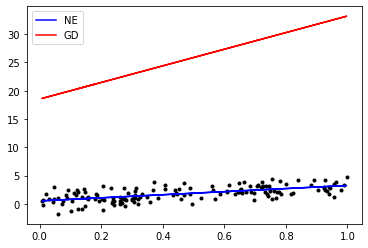

In [38]:
import matplotlib.pyplot as plt
plt.plot(X.iloc[:,1], y, '.k') #산점도
plt.plot(X.iloc[:,1], y_hat_NE, '-b', label = 'NE') #정규방정식
plt.plot(X.iloc[:,1], y_hat_GD, '-r', label = 'GD') #경사하강법
plt.legend()
plt.show()